In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, matthews_corrcoef, log_loss,classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

df = pd.read_csv("diabetes.csv")


df.info(), df.head(), df.describe()


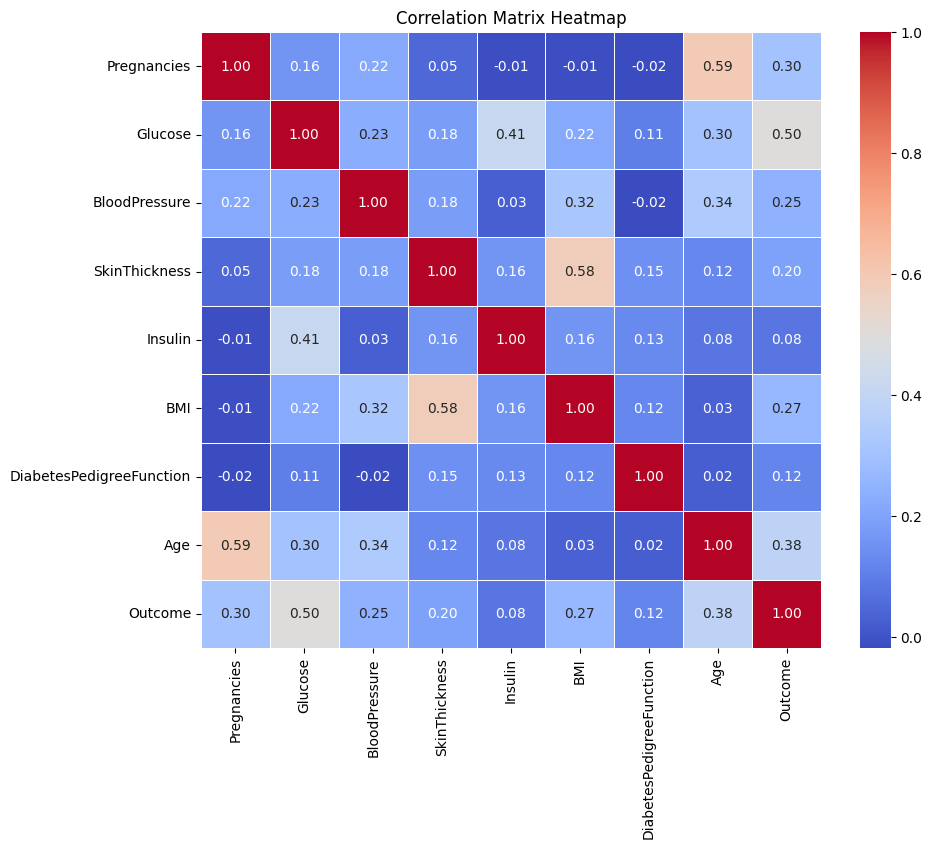

In [67]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()



In [69]:


# Load dataset
df = pd.read_csv("diabetes.csv")

# Define features where zero might indicate missing data
zero_features = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

# Count zeros in each row
df["zero_count"] = (df[zero_features] == 0).sum(axis=1)

# Separate classes
df_0 = df[df["Outcome"] == 0]  # Majority class
df_1 = df[df["Outcome"] == 1]  # Minority class

# Sort by zero count and drop the 230 rows with the most zeros
df_0 = df_0.sort_values(by="zero_count", ascending=False).iloc[232:]

# Drop the temporary zero_count column
df_0 = df_0.drop(columns=["zero_count"])
df_1 = df_1.drop(columns=["zero_count"])

# Merge back the balanced dataset
df_balanced = pd.concat([df_0, df_1]).sample(frac=1, random_state=42)  # Shuffle the data

# Save or use the balanced dataset
df_balanced.to_csv("balanced_diabetes.csv", index=False)
print("Dataset balanced! New class distribution:")
print(df_balanced["Outcome"].value_counts())


Dataset balanced! New class distribution:
Outcome
0    268
1    268
Name: count, dtype: int64


C:\Users\Amjad\AppData\Local\Temp\ipykernel_21520\1159450470.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=outcome_counts.index, y=outcome_counts.values, palette="viridis")


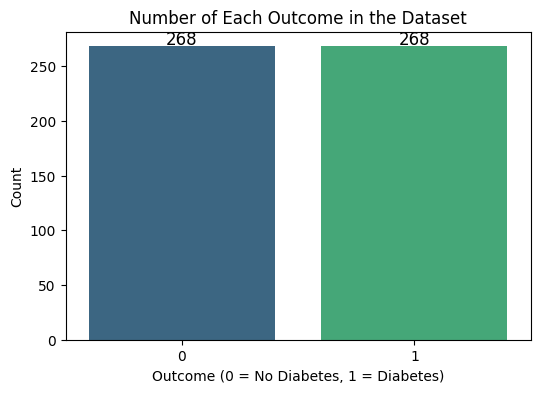

In [70]:

# Load the dataset
df = pd.read_csv("balanced_diabetes.csv")  

# Count occurrences of each outcome
outcome_counts = df["Outcome"].value_counts()

# Plot the bar chart
plt.figure(figsize=(6, 4))
sns.barplot(x=outcome_counts.index, y=outcome_counts.values, palette="viridis")

# Labels and title
plt.xlabel("Outcome (0 = No Diabetes, 1 = Diabetes)")
plt.ylabel("Count")
plt.title("Number of Each Outcome in the Dataset")

# Show the values on top of bars
for i, count in enumerate(outcome_counts.values):
    plt.text(i, count + 2, str(count), ha='center', fontsize=12)

plt.show()

In [73]:
# Identify the number of zeros in each of the relevant columns
columns_with_zeros = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

zero_counts = (df[columns_with_zeros] == 0).sum()
print(zero_counts)


Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64


In [72]:
# Replace zeros with the median of each column
for col in columns_with_zeros:
    median_value = df[col].median()
    df[col] = df[col].replace(0, median_value)


In [74]:


# Initialize scaler
scaler = MinMaxScaler()

# Apply MinMax scaling to all features except the target column
df[df.columns[:-1]] = scaler.fit_transform(df[df.columns[:-1]])


In [75]:

# Define features and target
X = df.drop(columns=["Outcome"])  # Features
y = df["Outcome"]  # Target variable

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [76]:


# Define the neural network architecture
model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    layers.Dense(8, activation='relu'),  # Hidden layer
    layers.Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))


Epoch 1/50


C:\Users\Amjad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5004 - loss: 0.7245 - val_accuracy: 0.5000 - val_loss: 0.7020
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5229 - loss: 0.6960 - val_accuracy: 0.5648 - val_loss: 0.6839
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6484 - loss: 0.6744 - val_accuracy: 0.5556 - val_loss: 0.6724
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6142 - loss: 0.6640 - val_accuracy: 0.6111 - val_loss: 0.6620
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6451 - loss: 0.6577 - val_accuracy: 0.6759 - val_loss: 0.6506
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6735 - loss: 0.6375 - val_accuracy: 0.6944 - val_loss: 0.6393
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7214 - loss: 0.6246 - val_accuracy: 0.6759 - val_loss: 0.6284
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7574 - loss: 0.6134 - val_accuracy: 0.6944 - val_loss: 0.6183
E

In [66]:
# Step 1: Predict the class labels and probabilities for the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Convert probabilities to class labels
y_pred_prob = model.predict(X_test)  # Predicted probabilities (for Log Loss, ROC-AUC)

# Step 2: Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Step 3: Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")

# Step 4: Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")

# Step 5: F1-Score
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1}")



# Step 7: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

# Step 8: Specificity (True Negative Rate)
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1]) if (cm[0, 0] + cm[0, 1]) != 0 else 0
print(f"Specificity: {specificity}")

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Accuracy: 0.8148148148148148
Precision: 0.7931034482758621
Recall: 0.8518518518518519
F1-Score: 0.8214285714285714
Confusion Matrix:
[[42 12]
 [ 8 46]]
Specificity: 0.7777777777777778
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.78      0.81        54
           1       0.79      0.85      0.82        54

    accuracy                           0.81       108
   macro avg       0.82      0.81      0.81       108
weighted avg       0.82      0.81      0.81       108

